# Instalação, importação e carregamento do dataframe

**Instalando bibliotecas**

In [28]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install polars


**Importando bibliotecas**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import plotly.express as px
from google.colab import drive


In [40]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df = pd.read_csv('/content/drive/MyDrive/data_sets/Sleep_health_and_lifestyle_dataset.csv')

# **Informações sobre o data set**

In [42]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [43]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [44]:
nomes_colunas = df.columns
nomes_colunas

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [45]:
pd.DataFrame(df.describe()) #Analise descritiva dos dados

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# **Distribuição das idades utilizando (matplotlib)**

Como é a distribuição por idade ?

In [46]:
idades = df['Age']
pd.DataFrame(idades.value_counts(normalize = True))

,Age
43,0.090909
44,0.080214
37,0.053476
38,0.053476
50,0.053476
31,0.048128
32,0.045455
53,0.045455
59,0.042781
39,0.040107


In [47]:
pd.DataFrame(idades.describe())

,Age
count,374.000000
mean,42.184492
std,8.673133
min,27.000000
25%,35.250000
50%,43.000000
75%,50.000000
max,59.000000


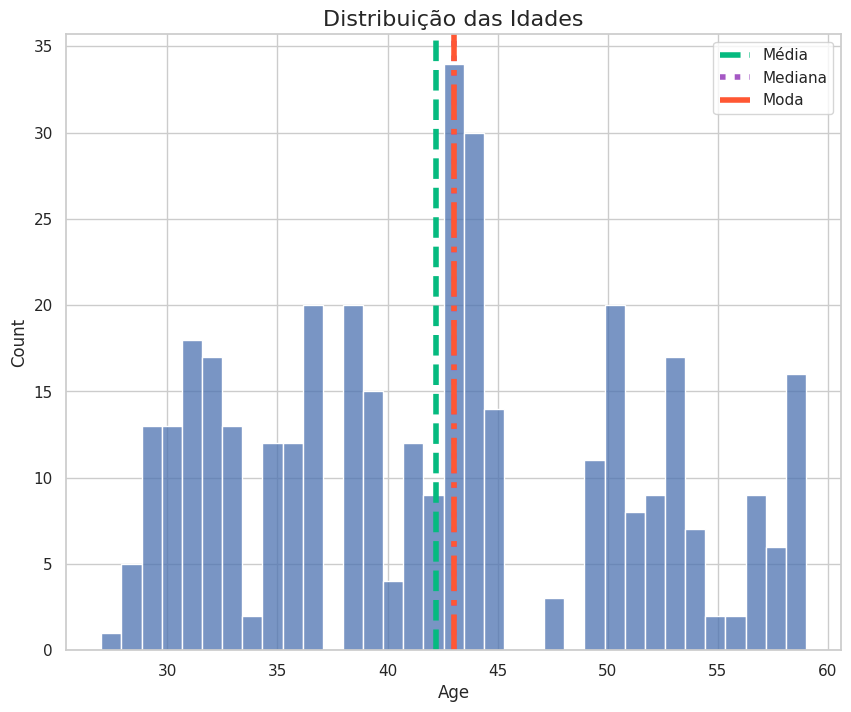

In [48]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
media_idades = plt.axvline(x = idades.mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
mediana_idades = plt.axvline(x = idades.median(), c = "#A558C4", linewidth = 4, linestyle = ':')
moda_idades = plt.axvline(x = idades.mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([media_idades, mediana_idades, moda_idades], ['Média', 'Mediana', 'Moda'])
sns.histplot(idades, bins = 35).set_title('Distribuição das Idades', fontsize = 16);

In [49]:
#Criando um histograma

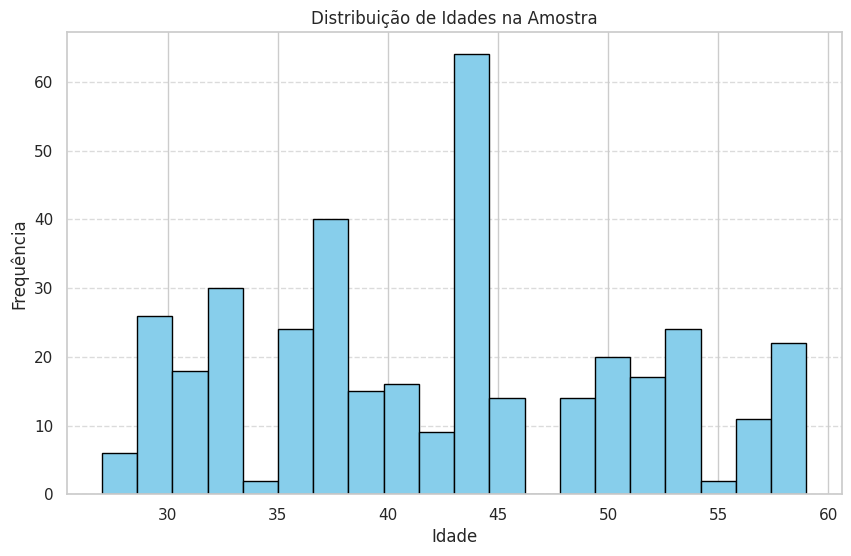

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(idades, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idades na Amostra')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Distribuição por sexo (utilizando a biblioteca plotly )**

**Qual é a distribuição de gênero na amostra?**

In [51]:
genero = df['Gender']
pd.DataFrame(genero.value_counts(normalize = True))

,Gender
Male,0.505348
Female,0.494652


In [57]:
# Criar DataFrame temporário para contar a ocorrência de cada valor em 'Gender'
contagem_genero = pd.DataFrame(genero.value_counts()).reset_index()

In [58]:
#Renomeando as colunas
contagem_genero.columns = ['Genero', 'Contagem']

In [60]:

# Criar gráfico de barras interativo com Plotly
#Nesse simples exemplo o eixo x vai ter o genero enquanto que o Y vai ter a quantidade.
fig = px.bar(contagem_genero, x='Genero', y='Contagem', color='Genero',
             labels={'Genero': 'Gênero', 'Contagem': 'Contagem'},
             title='Distribuição de Gênero na Amostra')

# Exibir o gráfico utilizando o fig.show()
fig.show()

# **Idade e Qualidade de sono**

Qual a relação entre idade e qualidade do sono ?

In [61]:
fig = px.scatter(df, x='Age', y='Quality of Sleep',
                 title='Relação entre Idade e Qualidade do Sono',
                 labels={'Age': 'Idade', 'Quality of Sleep': 'Qualidade do Sono'})

fig.show()

# **Níveis de Atividade Física**

Como estão distribuídos os níveis de atividade física na amostra?

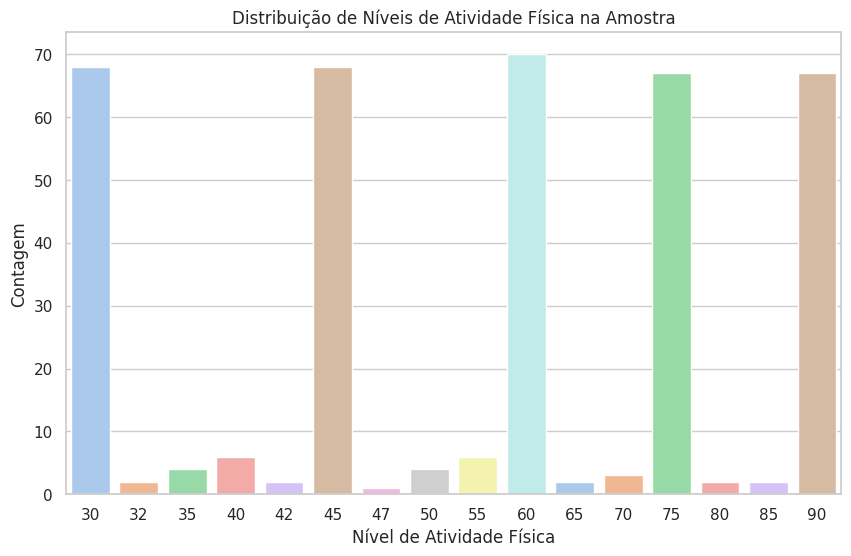

In [64]:
#Armazenar os dados d coluna na variavel
atividade_fisica = df['Physical Activity Level']

#Conta a quantidade e armazena na variavel
contagem_atividade_fisica = atividade_fisica.value_counts()

#configuração da biblioteca
sns.set(style="whitegrid")

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x=atividade_fisica, palette="pastel")
plt.title('Distribuição de Níveis de Atividade Física na Amostra')
plt.xlabel('Nível de Atividade Física')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.show()



In [73]:

atividade_fisica = df['Physical Activity Level']
contagem_atividade_fisica = pd.DataFrame(atividade_fisica.value_counts()).reset_index()
contagem_atividade_fisica.columns = ['Nivel', 'Contagem']
fig = px.bar(contagem_atividade_fisica, x='Nivel', y='Contagem', color='Nivel',
             labels={'Nivel': 'Nível de Atividade Física', 'Contagem': 'Contagem'},
             title='Distribuição de Níveis de Atividade Física na Amostra')
fig.show()

Realize a criação dos graficos com bibliotecas diferentes para analisar qual seria melhor para utilizar nesses casos.

# **Níveis de Estresse**

Como estão distribuídos os níveis de estresse?

In [66]:
niveis_estresse = df['Stress Level']
niveis_estresse.head()

0    6
1    8
2    8
3    8
4    8
Name: Stress Level, dtype: int64

In [67]:
contagem_estresse = pd.DataFrame(niveis_estresse.value_counts()).reset_index()
contagem_estresse.columns = ['Nivel', 'Contagem']

In [70]:
#Aqui é realizada a parte do grafico, passando a contagem de estreve e as colunas
fig = px.bar(contagem_estresse, x='Nivel', y='Contagem', color='Nivel',
             labels={'Nivel': 'Nível de Estresse', 'Contagem': 'Contagem'},
             title='Distribuição de Níveis de Estresse na Amostra')

# Exibir o gráfico
fig.show()

# **Distribuição de BMI (Índice de Massa Corporal)**



Como está distribuído o BMI na amostra?

In [76]:
bmi = df['BMI Category']

fig = px.histogram(df, x=bmi, title='Distribuição de BMI na Amostra',
                   labels={'BMI Category': 'Índice de Massa Corporal'},
                   color_discrete_sequence=['blue'])

# Exibir o gráfico
fig.show()